# Example Usage of the FlipPartnerMap class

This class is useful for verifying that a flip sequence is actually valid. It also provides functionality to build your algorithm on top of it, e.g., by searching for flippable edges or applying flips.

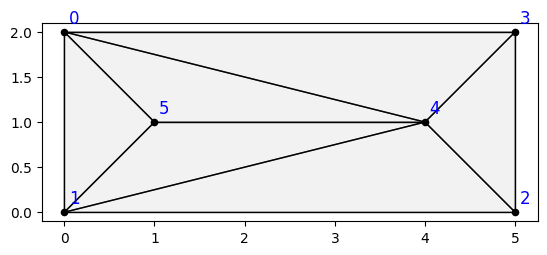

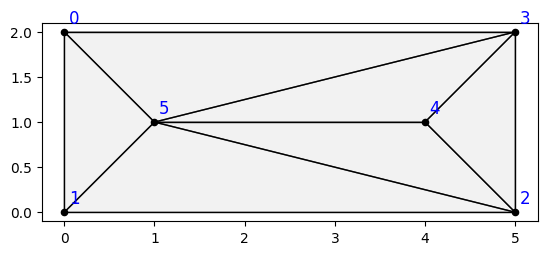

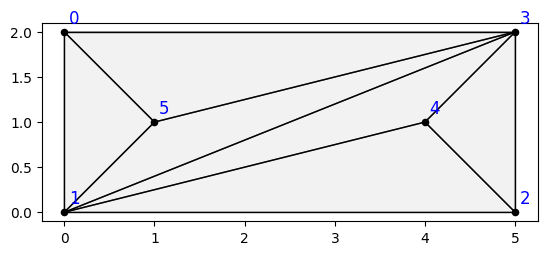

In [1]:
from cgshop2026_pyutils.geometry import FlippableTriangulation, draw_flips, Point

from cgshop2026_pyutils.schemas import CGSHOP2026Instance, CGSHOP2026Solution
from cgshop2026_pyutils.geometry import is_triangulation
from cgshop2026_pyutils.verify import check_for_errors


points = [((0,2)), (0,0), (5,0), (5,2), (4,1), (1,1)]
triang_1 =[(0,5), (0,4), (1,4), (1,5), (2,4), (3,4), (4,5)]
triang_2 = [(0,5), (1,5), (2,4), (2,5), (3,4),(3,5), (4,5)]
triang_3 = [(0,5), (1,4), (1,5), (1,3), (2,4), (3,4), (3,5)]
instance = CGSHOP2026Instance(
    instance_uid="test_instance_1",
    points_x=[x for x, y in points],
    points_y=[y for x, y in points],
    triangulations=[triang_1, triang_2, triang_3],
)
for triang in instance.triangulations:
    points = [Point(x, y) for x, y in zip(instance.points_x, instance.points_y)]
    assert is_triangulation(points, triang, verbose=False), f"Triangulation {triang} is not valid for the given points."


flippable_triang_1 = FlippableTriangulation.from_points_edges([Point(x,y) for x,y in points], triang_1)
flippable_triang_2 = FlippableTriangulation.from_points_edges([Point(x,y) for x,y in points], triang_2)
flippable_triang_3 = FlippableTriangulation.from_points_edges([Point(x,y) for x,y in points], triang_3)

draw_flips(flippable_triang_1, show_indices=True )
draw_flips(flippable_triang_2,  show_indices=True)
draw_flips(flippable_triang_3, show_indices=True)

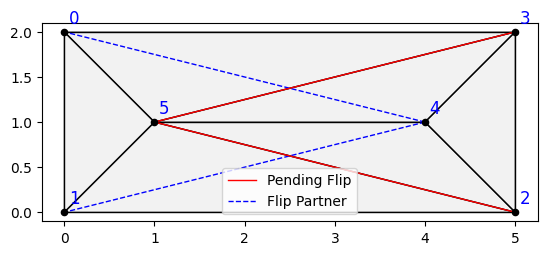

In [2]:
flippable_triang_2.add_flip((3,5))
flippable_triang_2.add_flip((2,5))
draw_flips(flippable_triang_2,  show_indices=True)
flippable_triang_2.commit()
assert flippable_triang_1 == flippable_triang_2

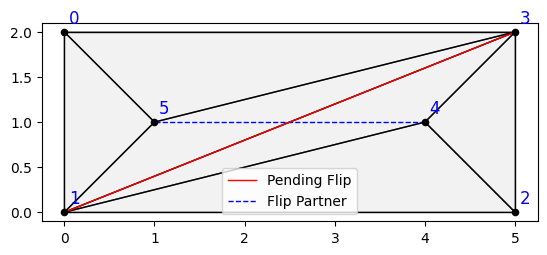

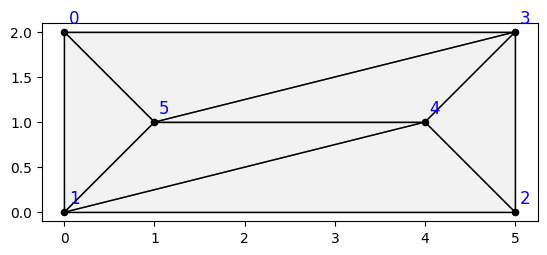

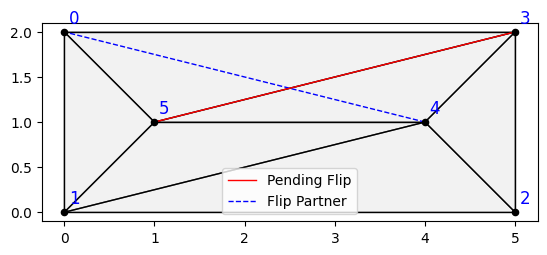

In [3]:
flippable_triang_3.add_flip((1,3))
draw_flips(flippable_triang_3, show_indices=True)
flippable_triang_3.commit()
draw_flips(flippable_triang_3, show_indices=True)
flippable_triang_3.add_flip((3,5))
draw_flips(flippable_triang_3, show_indices=True)
flippable_triang_3.commit()
assert flippable_triang_1 == flippable_triang_3

In [8]:
flips_1 = []
flips_2= [[(3,5), (2,5)]]
flips_3 = [[(1,3)], [(3,5)]]
solution = CGSHOP2026Solution(instance_uid="test_instance_1", flips=[flips_1, flips_2, flips_3])
errors = check_for_errors(instance, solution)
assert not errors, f"Errors found in solution: {errors}"